# Classification on Mutag dataset

In [1]:
import numpy as np
import os,sys
module_path = os.path.abspath(os.path.join('/Users/vayer/Documents/OT/Python/GW_tests/'))
if module_path not in sys.path:
    sys.path.append(module_path)
from graph import *
import copy
import NN,time
from sklearn.model_selection import StratifiedKFold
import ot_distances

In [2]:
path='./mutag/'

In [3]:
dataset=build_mutag_dataset(path)

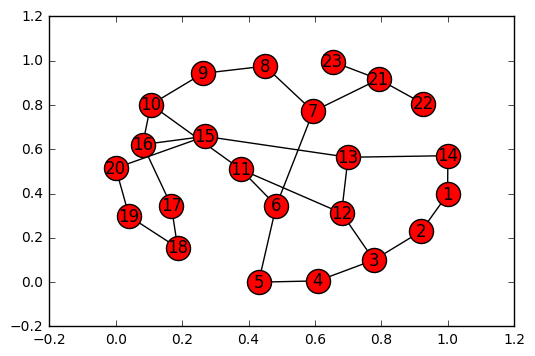

In [4]:
dataset[0][0].display_graph()

# Shortest path

In [5]:
alpha=0.005
epsilon=10

In [6]:
dist1=ot_distances.wgw_graph_distance(alpha,epsilon,features_metric='dirac')
dist2=ot_distances.emd_graph_distance

In [9]:
graph1=dataset[0][0]
graph2=dataset[10][0]
graph1=dataset[0][0]
graph2=dataset[1][0]

In [10]:
dist1(graph1,graph2)

0.76802652176831709

In [38]:
graph1=dataset[0][0]
graph2=dataset[10][0]
a=[]
b=[]
#for alpha in list(np.linspace(0.001,20,15)):
    #for epsilon in list(np.linspace(0.01,500,10)):
for alpha in list(np.linspace(0.001,2,20)):  
    for epsilon in list(np.linspace(0.01,5,10)): 
        dist1=ot_distances.wgw_graph_distance(alpha,epsilon,features_metric='dirac')
        dist2=ot_distances.emd_graph_distance
        a.append(dist1(graph1,graph2))
        b.append(dist2(graph1,graph2))

//anaconda/lib/python3.5/site-packages/ot/bregman.py:344: RuntimeWarning: overflow encountered in exp
  K = np.exp(-M / reg)


//anaconda/lib/python3.5/site-packages/ot/bregman.py:347: RuntimeWarning: overflow encountered in multiply
  Kp = (1 / a).reshape(-1, 1) * K


//anaconda/lib/python3.5/site-packages/ot/bregman.py:355: RuntimeWarning: divide by zero encountered in true_divide
  u = 1. / np.dot(Kp, v)


/Users/vayer/Documents/OT/Python/GW_tests/WGW_2.py:58: RuntimeWarning: overflow encountered in multiply
  log_struct['GW_dist'].append(np.sum(T*Cost))


In [39]:
a

[0.58409874687041263,
 0.59064738928012095,
 0.6042824524523599,
 0.6138093542704306,
 0.62002431093761456,
 0.62427932674204289,
 0.62734580086562652,
 0.62965104470771704,
 0.6314434194288403,
 0.63287524645339355,
 nan,
 1.4297149784840177,
 1.5148251717737322,
 1.5274945990121147,
 1.5344860979637571,
 1.5389797526252589,
 1.5421032393179837,
 1.544405162080694,
 1.5461687000416133,
 1.5475600096035089,
 nan,
 1.6016770232613677,
 2.2856824157131888,
 2.4155869613217531,
 2.431099913687631,
 2.4395891081070049,
 2.4451684101221955,
 2.4491446805042498,
 2.4521284444155187,
 2.4544601691124845,
 nan,
 1.7685092904980317,
 2.445724148187749,
 3.1419844575143863,
 3.3058171747944338,
 3.3249640749415654,
 3.335913165555739,
 3.3434480392912485,
 3.3490232383788712,
 3.3533332768640025,
 nan,
 1.9283029302771122,
 2.5983985002487233,
 3.2904522167058268,
 3.9983905996825229,
 4.1908943433416566,
 4.2134419078080576,
 4.2268757285005103,
 4.2365518995373153,
 4.2439486663815691,
 nan,
 

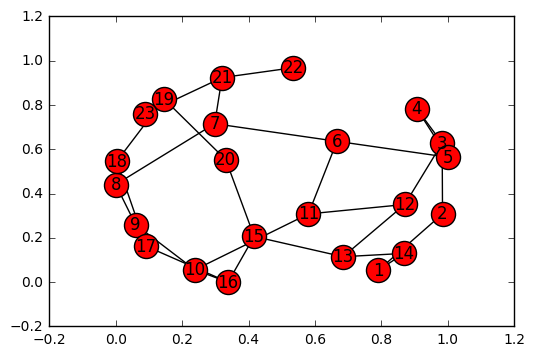

In [49]:
graph1.display_graph()

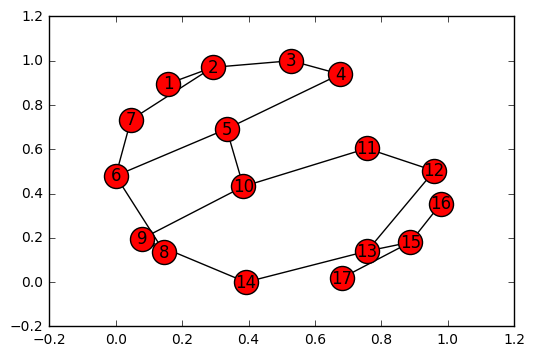

In [50]:
graph2.display_graph()

In [46]:
method='shortest_path'
nodes1=graph1.nodes()
nodes2=graph2.nodes()
C1=graph1.distance_matrix(method=method)
C2=graph2.distance_matrix(method=method)
t1masses = np.ones(len(nodes1))/len(nodes1)
t2masses = np.ones(len(nodes2))/len(nodes2)
x1=graph1.all_matrix_attr().reshape(-1, 1)
x2=graph2.all_matrix_attr().reshape(-1, 1)
f=lambda x,y: x==y
M=ot.dist(x1,x2,metric=f)
M= M/np.max(M)

In [72]:
def minimum_distance(C1,C2,i,j):
    a=[]
    for k in range(C1.shape[1]):
        for l in range(C2.shape[1]):
            a.append(abs(C1[i,k]-C2[j,l])**2)
    return min(a),max(a)

def max_min(C1,C2,indx=0):
    a=[]
    for i in range(C1.shape[0]):
        for j in range(C2.shape[0]):
            a.append(minimum_distance(C1,C2,i,j)[indx])
    return max(a)

In [74]:
max_min(C1,C2,1)

81.0

In [71]:
np.max(C1)

9.0

In [45]:
np.max(C2)

9.0

In [47]:
np.max(M)

1.0

In [48]:
len(C2)

17

In [49]:
len(C1)

23

In [54]:
def f1(a):
    return (a**2) 
def f2(b):
    return (b**2)    
def h1(a):
    return a    
def h2(b):
    return 2*b
def const(p,q,C1,C2):
    constC1=np.dot(np.dot(f1(C1),p.reshape(-1,1)),np.ones(len(q)).reshape(1,-1))
    constC2=np.dot(np.ones(len(p)).reshape(-1,1),np.dot(q.reshape(1,-1),f2(C2).T))
    constC=constC1+constC2
    return constC
def tens(p,q,C1,C2,G):
    hC1=h1(C1)
    hC2=h2(C2)
    constC=const(p,q,C1,C2)
    return constC-np.dot(hC1, G).dot(hC2.T)

In [56]:
tens=tens(t1masses,t2masses,C1,C2,np.eye(len(t1masses), len(t2masses)))

In [57]:
x1=graph1.all_matrix_attr().reshape(-1, 1)
x2=graph2.all_matrix_attr().reshape(-1, 1)

In [59]:
f=lambda x,y: x==y
M=ot.dist(x1,x2,metric=f)
M= M/np.max(M)

In [61]:
tens

array([[-475.95396419, -490.95396419, -424.42455243, -344.60102302,
        -330.30690537, -397.77749361, -313.24808184, -290.65984655,
        -321.89514066, -352.30690537, -385.42455243, -353.01278772,
        -324.48337596, -410.83631714, -506.42455243, -502.42455243,
        -563.42455243],
       [-370.60613811, -391.60613811, -343.07672634, -281.25319693,
        -260.95907928, -310.42966752, -243.90025575, -229.31202046,
        -262.54731458, -290.95907928, -314.07672634, -279.66496164,
        -253.13554987, -323.48849105, -397.07672634, -393.07672634,
        -436.07672634],
       [-456.47570332, -471.47570332, -416.94629156, -349.12276215,
        -334.8286445 , -390.29923274, -305.76982097, -271.18158568,
        -310.4168798 , -328.8286445 , -341.94629156, -301.53452685,
        -285.00511509, -347.35805627, -430.94629156, -426.94629156,
        -531.94629156],
       [-433.56265985, -442.56265985, -394.03324808, -340.20971867,
        -331.91560102, -381.38618926, -302.8

In [63]:
G=np.asarray(M+alpha*tens)

In [64]:
K=np.exp(-G/epsilon)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':


Le tenseur a des valeurs beaucoup trop grandes.